<a href="https://colab.research.google.com/github/sebinsaji007/deep_learning-_journey/blob/main/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import PIL
from tensorflow import keras


In [3]:
cd /content/drive/MyDrive/python/deep learning/cnn

[Errno 2] No such file or directory: '/content/drive/MyDrive/python/deep learning/cnn'
/content


In [4]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file('flower_photos',origin=dataset_url, cache_dir='.',untar=True)
data_dir = pathlib.Path(archive)

In [5]:
roses = list(data_dir.glob('roses/*'))

In [6]:
roses[:5]

[PosixPath('datasets/flower_photos/roses/2501297526_cbd66a3f7e_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466393_6556afeb2f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3292654244_4a220ab96f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/7316409504_7cf3707f8a_m.jpg'),
 PosixPath('datasets/flower_photos/roses/21347496068_f4d3339607.jpg')]

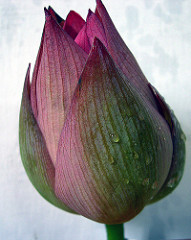

In [7]:
PIL.Image.open(str(roses[1]))

In [8]:
flower_name = {
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'roses':list(data_dir.glob('roses/*')),
    'sunflower':list(data_dir.glob('sunflower/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

In [9]:
flower_num = {
    'daisy':0,
    'dandelion':1,
    'roses':2,
    'sunflower':3,
    'tulips':4
}

In [10]:
flower_name['roses'][0]

PosixPath('datasets/flower_photos/roses/2501297526_cbd66a3f7e_m.jpg')

In [11]:
img = cv2.imread(str(flower_name['roses'][0]))
img

array([[[ 89, 135, 113],
        [137, 176, 155],
        [144, 176, 159],
        ...,
        [ 26,  76,  52],
        [ 25,  75,  51],
        [ 24,  75,  48]],

       [[ 75, 123,  97],
        [100, 142, 117],
        [136, 169, 148],
        ...,
        [ 29,  79,  55],
        [ 28,  78,  54],
        [ 27,  78,  51]],

       [[ 78, 130, 100],
        [ 90, 135, 108],
        [106, 142, 118],
        ...,
        [ 32,  82,  58],
        [ 31,  82,  55],
        [ 31,  82,  55]],

       ...,

       [[ 19,  76,  43],
        [ 15,  76,  40],
        [ 26,  84,  49],
        ...,
        [ 30,  87,  54],
        [ 30,  87,  54],
        [ 31,  88,  55]],

       [[ 22,  81,  50],
        [ 22,  82,  48],
        [ 32,  90,  55],
        ...,
        [ 29,  87,  52],
        [ 29,  87,  52],
        [ 30,  88,  53]],

       [[ 34,  93,  62],
        [ 32,  92,  58],
        [ 37,  95,  60],
        ...,
        [ 26,  87,  51],
        [ 28,  86,  51],
        [ 29,  87,  52]]

In [12]:
X,y = [],[]

In [13]:
for flower_name, images in flower_name.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        X.append(resized_img)
        y.append(flower_num[flower_name])




In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=0)

In [15]:

scaling_factor = 255.0
X_train_scaled = [img / scaling_factor for img in X_train]
X_test_scaled = [img / scaling_factor for img in X_test]


In [16]:
X_test_scaled

[array([[[0.25490196, 0.46666667, 0.72941176],
         [0.22745098, 0.44313725, 0.7254902 ],
         [0.23529412, 0.45490196, 0.75294118],
         ...,
         [0.89411765, 0.90196078, 0.9254902 ],
         [0.84705882, 0.91372549, 0.92156863],
         [0.8627451 , 0.9254902 , 0.9372549 ]],
 
        [[0.29019608, 0.50196078, 0.75294118],
         [0.24313725, 0.46666667, 0.73333333],
         [0.24705882, 0.47843137, 0.75294118],
         ...,
         [0.87058824, 0.92156863, 0.9372549 ],
         [0.83529412, 0.91764706, 0.92156863],
         [0.86666667, 0.92941176, 0.93333333]],
 
        [[0.30196078, 0.5254902 , 0.76078431],
         [0.2745098 , 0.50588235, 0.75294118],
         [0.27843137, 0.51764706, 0.77647059],
         ...,
         [0.86666667, 0.91764706, 0.92941176],
         [0.89019608, 0.90196078, 0.91764706],
         [0.89019608, 0.91764706, 0.92941176]],
 
        ...,
 
        [[0.14509804, 0.25098039, 0.48627451],
         [0.20784314, 0.30196078, 0.51372

In [17]:
num_classes = 5

X_train_scaled = np.array(X_train_scaled)
y_train = np.array(y_train)
# Remove the following line:
# y_train = to_categorical(y_train, num_classes=num_classes)

# Keep y_train as numpy array without one-hot encoding
y_train = np.array(y_train, dtype=np.int32)


In [20]:
num_classes = 5

model = keras.Sequential([
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),

  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes, activation='softmax')  # Single unit with softmax
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [22]:
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
model.fit(X_train_scaled, y_train_one_hot, epochs=2)


Epoch 1/2


InvalidArgumentError: ignored

In [ ]:
predictions = model.predict(X_test_scaled)
predictions